In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_dir = './data'

data_entry_file = os.path.join(data_dir, 'Data_Entry_2017_v2020.csv')

data_entry_df = pd.read_csv(data_entry_file)

In [3]:
data_entry_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [4]:
data_entry_df_copy = data_entry_df.copy()

In [5]:
finding_labels_df = data_entry_df_copy['Finding Labels'].str.get_dummies(sep='|')

data_entry_df_copy = pd.concat([data_entry_df_copy, finding_labels_df], 1)

In [6]:
data_entry_df_copy.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Atelectasis',
       'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema',
       'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [7]:
old_new_columns_map = {
    'Image Index': 'image_index',
    'Finding Labels': 'finding_labels',
    'Follow-up #': 'follow_up_number',
    'Patient ID': 'patient_id',
    'Patient Age':'patient_age',
    'Patient Gender': 'patient_gender',
    'View Position': 'view_position',
    'OriginalImage[Width': 'original_image_width',
    'Height]': 'original_image_height',
    'OriginalImagePixelSpacing[x': 'original_image_pixel_spacing_x',
    'y]': 'original_image_pixel_spacing_y',
    'Atelectasis': 'atelectasis',
    'Cardiomegaly': 'cardiomegaly',
    'Consolidation': 'consolidation',
    'Edema': 'edema',
    'Effusion': 'effusion',
    'Emphysema': 'emphysema',
    'Fibrosis': 'fibrosis',
    'Hernia': 'hernia',
    'Infiltration': 'infiltration',
    'Mass': 'mass',
    'No Finding': 'no_finding',
    'Nodule': 'nodule',
    'Pleural_Thickening': 'pleural_thickening',
    'Pneumonia': 'pneumonia',
    'Pneumothorax': 'pneumothorax'
}

data_entry_df_copy.rename(columns=old_new_columns_map, inplace=True)

In [8]:
old_new_columns_map = {
    'Atelectasis': 'atelectasis',
    'Cardiomegaly': 'cardiomegaly',
    'Consolidation': 'consolidation',
    'Edema': 'edema',
    'Effusion': 'effusion',
    'Emphysema': 'emphysema',
    'Fibrosis': 'fibrosis',
    'Hernia': 'hernia',
    'Infiltration': 'infiltration',
    'Mass': 'mass',
    'No Finding': 'no_finding',
    'Nodule': 'nodule',
    'Pleural_Thickening': 'pleural_thickening',
    'Pneumonia': 'pneumonia',
    'Pneumothorax': 'pneumothorax'
}

finding_labels_df.rename(columns=old_new_columns_map, inplace=True)

In [9]:
current_palette = sns.color_palette("colorblind")

sns.set_palette(current_palette)

base_color=current_palette[0]

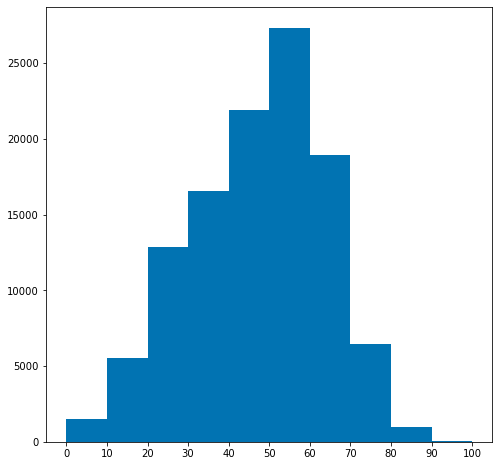

In [10]:
plt.rcParams['figure.figsize'] = (8, 8)

bins = np.arange(0, 95+10, 10)

plt.hist(data_entry_df_copy['patient_age'], bins=bins)

plt.xticks(bins)

plt.show()

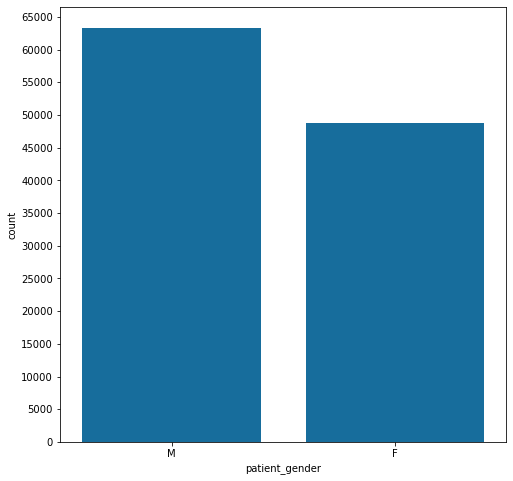

In [11]:
plt.rcParams['figure.figsize'] = (8, 8)

bins = np.arange(0, 63340+5000, 5000)

sns.countplot(data=data_entry_df_copy, x='patient_gender', color=base_color)

plt.yticks(bins)

plt.show()

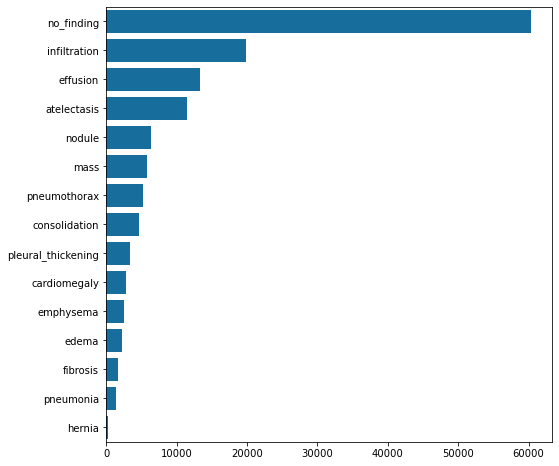

In [12]:
plt.rcParams['figure.figsize'] = (8, 8)

finding_labels_sums = finding_labels_df.sum()

sns.barplot(
    x=finding_labels_sums,
    y=finding_labels_sums.keys(), 
    color=base_color,
    order=finding_labels_sums.sort_values(ascending=False).index
)

plt.show()

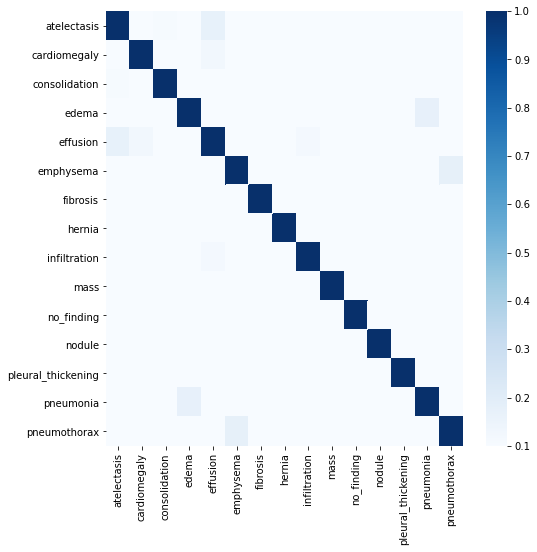

In [13]:
plt.rcParams['figure.figsize'] = (8, 8)

# calculate the correlation matrix
corr = finding_labels_df.corr()

# plot the heatmap
sns.heatmap(
    corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    vmin=0.1,
    cmap='Blues'
)

plt.show()

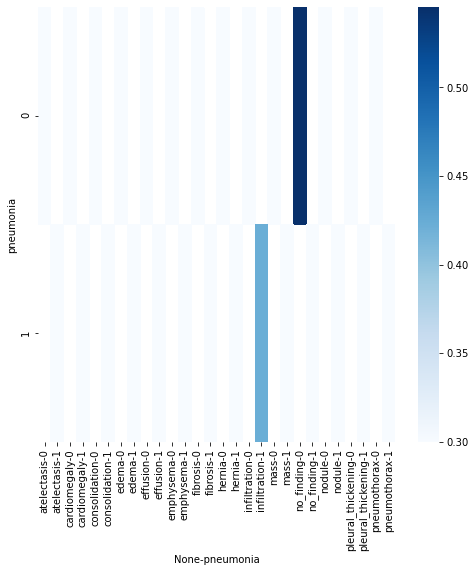

In [14]:
plt.rcParams['figure.figsize'] = (8, 8)

heatmap1_data = pd.pivot_table(finding_labels_df, 
                     index='pneumonia', 
                     columns=['pneumonia'])
                    

sns.heatmap(heatmap1_data, cmap="Blues", vmin=0.3)

plt.show()

In [15]:
data_entry_df_copy['number_of_dieases'] = \
    data_entry_df_copy[finding_labels_df.columns.drop('no_finding')].sum(axis=1)

In [16]:
finding_labels_df.sum()

atelectasis           11559
cardiomegaly           2776
consolidation          4667
edema                  2303
effusion              13317
emphysema              2516
fibrosis               1686
hernia                  227
infiltration          19894
mass                   5782
no_finding            60361
nodule                 6331
pleural_thickening     3385
pneumonia              1431
pneumothorax           5302
dtype: int64

In [17]:
group_by_patient_df = data_entry_df_copy.groupby('patient_id', as_index=False)

In [18]:
number_of_diseases_per_patient = group_by_patient_df[['number_of_dieases']].sum() 

number_of_diseases_per_patient

,patient_id,number_of_dieases
0,1,5
1,2,0
2,3,9
3,4,2
4,5,3
...,...,...
30800,30801,2
30801,30802,0
30802,30803,0
30803,30804,0


In [19]:
number_of_diseases_per_patient.query('number_of_dieases == 0').count()

patient_id           16403
number_of_dieases    16403
dtype: int64

In [20]:
number_of_diseases_per_patient.query('number_of_dieases > 0').count()

patient_id           14402
number_of_dieases    14402
dtype: int64

In [21]:
finding_labels_df['pneumonia'].sum()

1431

In [22]:
finding_labels_df.query('pneumonia != 1').shape[0]

110689

In [23]:
data_entry_df_copy['view_position'].unique()

array(['PA', 'AP'], dtype=object)

In [24]:
data_entry_df_copy.query('view_position == "PA"').shape[0]

67310

In [25]:
data_entry_df_copy.query('view_position == "AP"').shape[0]

44810

---
---
---

In [26]:
sample_size = len(data_entry_df_copy)
training_size = int(np.rint(sample_size * 0.8))
testing_size = sample_size - training_size

In [27]:
print('The number of entries is: {}'.format(sample_size))
print('The number of training images: {}'.format(training_size))
print('The number of testing images: {}'.format(testing_size))

The number of entries is: 112120
The number of training images: 89696
The number of testing images: 22424


# Distribution of Diseases & Comorbidities

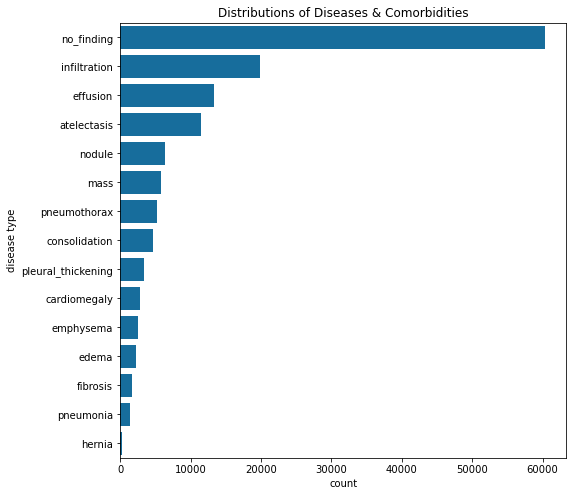

In [28]:
plt.rcParams['figure.figsize'] = (8, 8)

finding_labels_sums = finding_labels_df.sum()

sns.barplot(
    x=finding_labels_sums,
    y=finding_labels_sums.keys(), 
    color=base_color,
    order=finding_labels_sums.sort_values(ascending=False).index
)

plt.xlabel('count')
plt.ylabel('disease type')

plt.title('Distributions of Diseases & Comorbidities')

plt.show()

In [29]:
finding_labels_counts = data_entry_df_copy['finding_labels'].value_counts()

finding_labels_counts = finding_labels_counts.sort_values(ascending=False)

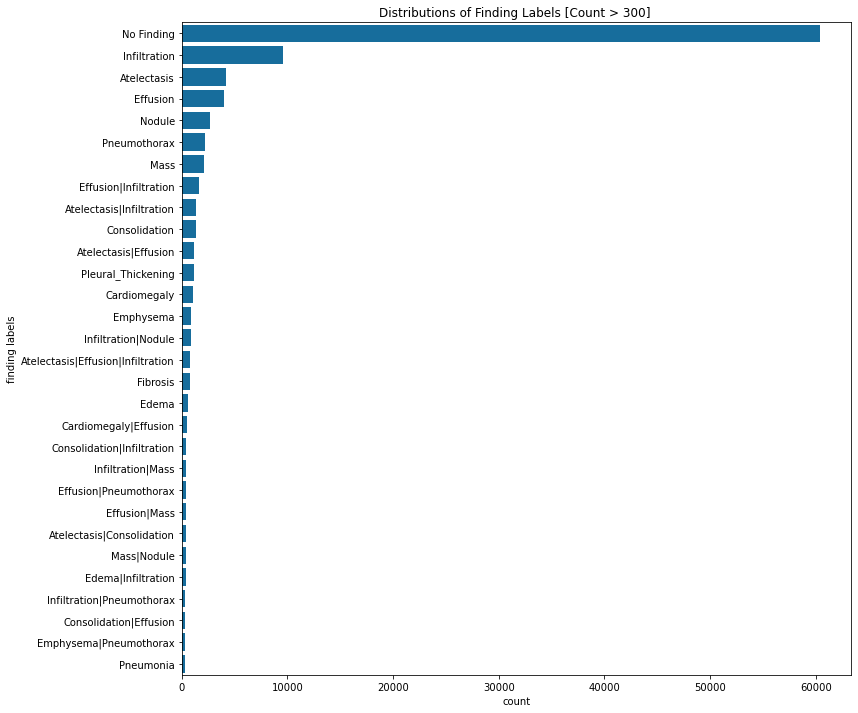

In [30]:
greater_than_300_finding_labels = finding_labels_counts[finding_labels_counts > 300]


plt.rcParams['figure.figsize'] = (12, 12)


sns.barplot(
    x=greater_than_300_finding_labels,
    y=greater_than_300_finding_labels.keys(), 
    color=base_color,
    order=greater_than_300_finding_labels.index
)

plt.xlabel('count')
plt.ylabel('finding labels')

plt.title('Distributions of Finding Labels [Count > 300] ')

plt.show()

In [31]:
pneumonia_pct = finding_labels_counts['Pneumonia'] / sample_size

In [32]:
print('The percentage of Pneumonia is {:.6f}'.format(pneumonia_pct))

print('The number of Pneumonia cases in total is {}'.format(
    finding_labels_counts['Pneumonia']))
print('The number of Pneumonia cases in training set should be {}'.format(
    int(np.rint(training_size * pneumonia_pct))))
print('The number of Pneumonia cases in testing set should be {}'.format(
    int(np.rint(testing_size * pneumonia_pct))))

The percentage of Pneumonia is 0.002872
The number of Pneumonia cases in total is 322
The number of Pneumonia cases in training set should be 258
The number of Pneumonia cases in testing set should be 64


# Distributions of Basic Demographics 

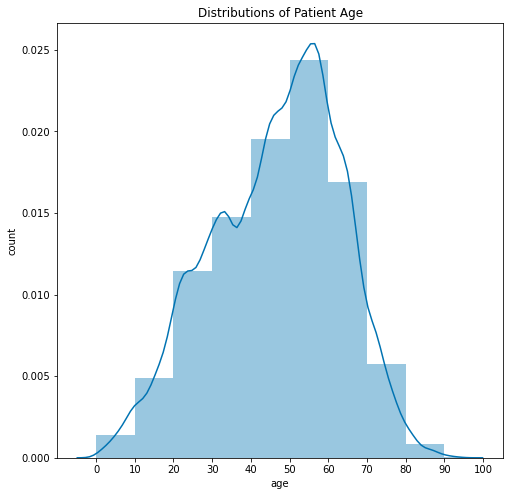

In [33]:
plt.rcParams['figure.figsize'] = (8, 8)

bins = np.arange(0, 95+10, 10)

sns.distplot(data_entry_df_copy['patient_age'], bins=bins, color=base_color)

plt.xticks(bins)

plt.xlabel('age')
plt.ylabel('count')

plt.title('Distributions of Patient Age')

plt.show()

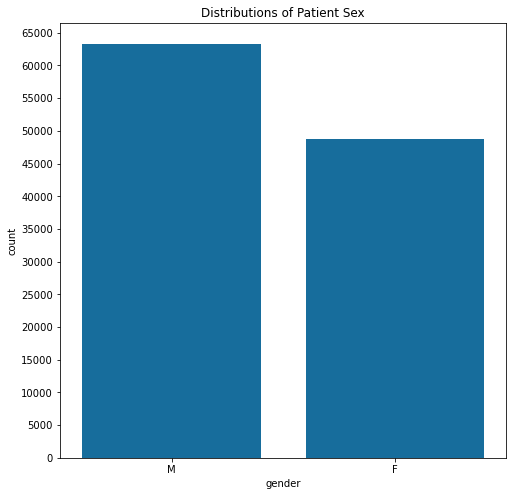

In [34]:
bins = np.arange(0, 63340+5000, 5000)

sns.countplot(data=data_entry_df_copy, x='patient_gender', color=base_color)

plt.yticks(bins)

plt.xlabel('gender')
plt.ylabel('count')

plt.title('Distributions of Patient Sex')

plt.show()

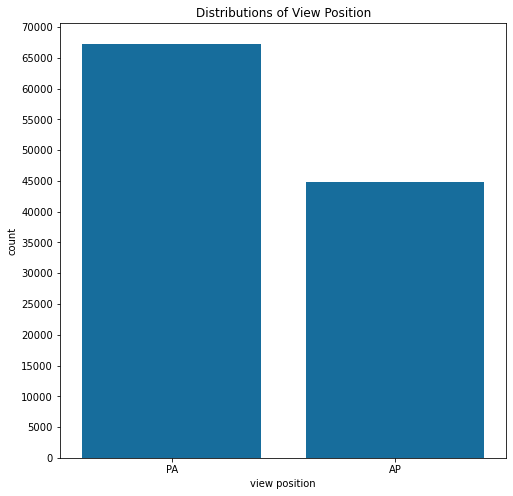

In [35]:
plt.rcParams['figure.figsize'] = (8, 8)

bins = np.arange(0, 67310+5000, 5000)

sns.countplot(data=data_entry_df_copy, x='view_position', color=base_color)

plt.yticks(bins)

plt.xlabel('view position')
plt.ylabel('count')

plt.title('Distributions of View Position')

plt.show()